# STATS 102 Final Project
Team members: Anar, Angarag, Temuulen
## Predicting whether a person has sleep disorder or not through logistic regression

Data info:
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Initial library imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

Loading our data. 

In the "BMI Category" column, there were "normal" bmi and "normal weight" bmi. Thus, we will be changing the latter to "normal".

In [3]:
dt = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dt = dt.assign(BMI_Category=lambda x: x['BMI Category'].map({'Obese': "Obese", 'Normal': 'Normal', 'Overweight': 'Overweight', 'Normal Weight': 'Normal'}))
dt.drop(columns = "BMI Category", inplace= True)

In [4]:
dt.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BMI_Category'],
      dtype='object')

In [5]:
dt.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN,Overweight
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
5,6,Male,28,Software Engineer,5.9,4,30,8,140/90,85,3000,Insomnia,Obese
6,7,Male,29,Teacher,6.3,6,40,7,140/90,82,3500,Insomnia,Obese
7,8,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,NaN,Normal
8,9,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,NaN,Normal
9,10,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,NaN,Normal


In [6]:
dt.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


In [7]:
dt.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
BMI_Category                 0
dtype: int64

There is no NaN values in our dataset

In [8]:
dt['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

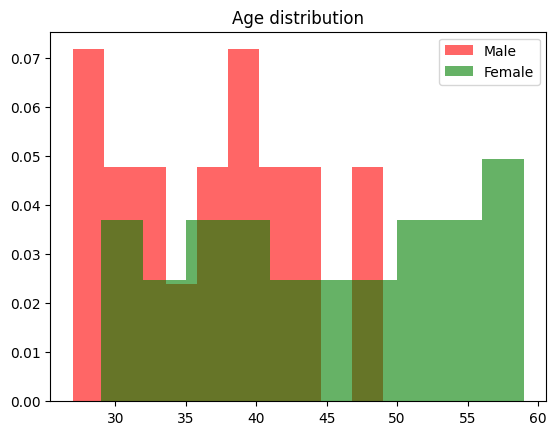

In [9]:
# Check the distribution of 'Age' column
df_ga = dt.groupby(['Age', 'Gender']).size().reset_index(name='count')

# Select data for male and female
df_m = df_ga[df_ga['Gender'] == 'Male']
df_f = df_ga[df_ga['Gender'] == 'Female']

plt.hist(data=df_m, x='Age', color='red', alpha=0.6, density=True, label='Male')
plt.hist(data=df_f, x='Age', color='green', alpha=0.6, density=True, label='Female')
plt.title('Age distribution')
plt.legend()
plt.show()


Changing the data to different groups

For blood pressure:
- Ideal blood pressure systolic (upper number) : less than 120 , diastolic (bottom number) : less than 80

- Normal systolic (upper number) : in range (120 - 129) , diastolic (bottom number) : in range (80 - 84)

- Otherwise, blood pressure is high (which is 1)

In [10]:
dt['Blood Pressure']=dt['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# for i in dt[["Age", "Heart Rate", "Daily Steps", "Sleep Duration", "Physical Activity Level"]]: 
# 	dt[i] = dt[i] / dt[i].abs().max() 

Converting non-numeric data (String or Boolean) into numbers and dropping "Person ID" since it is useless.

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dt.drop(['Person ID','Occupation'], axis=1, inplace=True)
categories=['Gender','BMI_Category','Sleep Disorder']
for label in categories:
    dt[label]=LE.fit_transform(dt[label])

In [12]:
print(dt['Gender'])

0      1
1      1
2      1
3      1
4      1
      ..
369    0
370    0
371    0
372    0
373    0
Name: Gender, Length: 374, dtype: int64


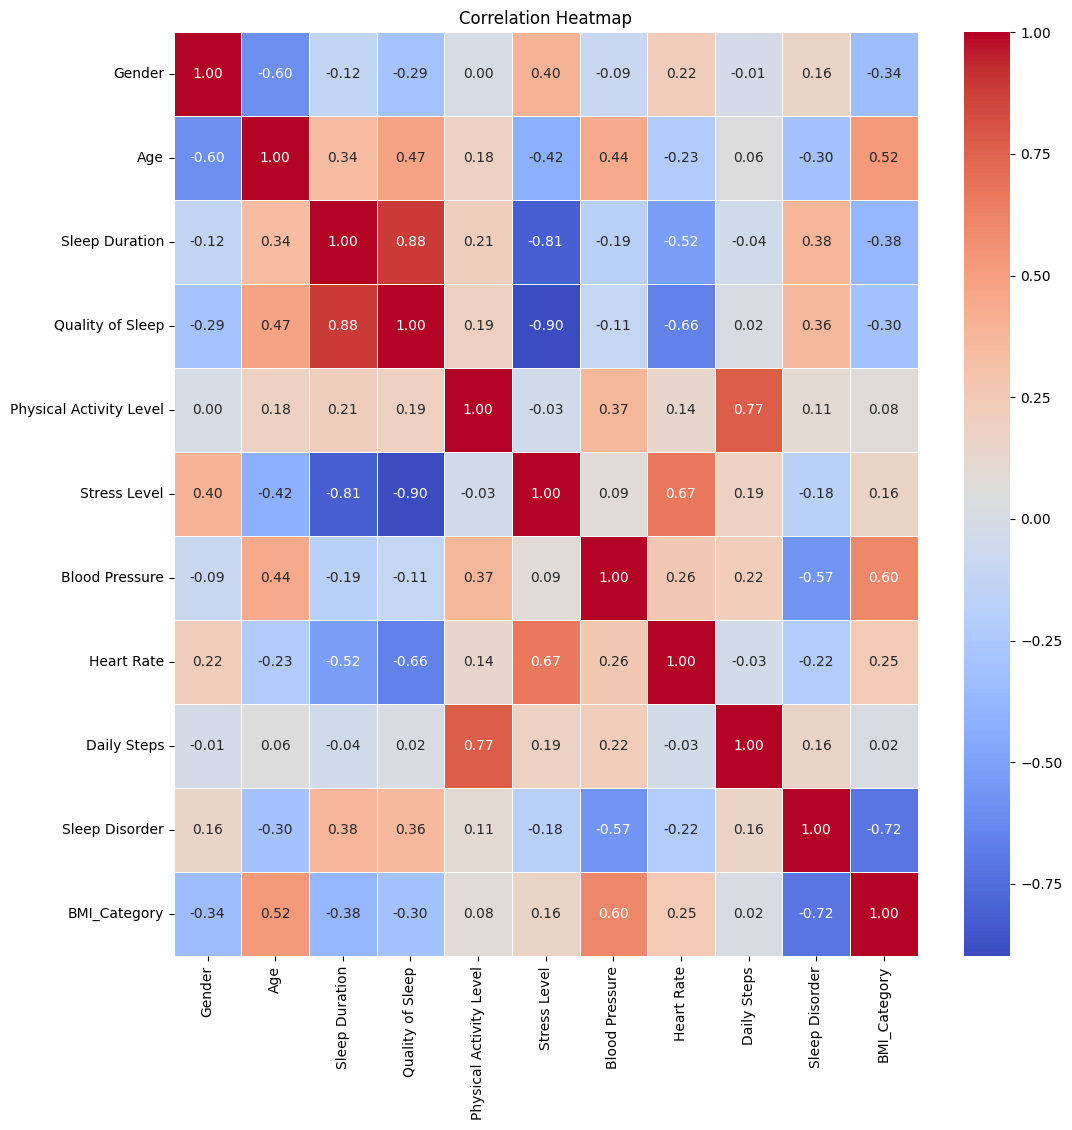

In [13]:
matrix = dt.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
dt.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,27,6.1,6,42,6,0,77,4200,2,2
1,1,28,6.2,6,60,8,0,75,10000,2,0
2,1,28,6.2,6,60,8,0,75,10000,2,0
3,1,28,5.9,4,30,8,1,85,3000,1,1
4,1,28,5.9,4,30,8,1,85,3000,1,1


Splitting our data into 75,25 for training and testing.

In [15]:
x = dt.drop(columns=['Sleep Disorder'])  # Drop the target feature from the feature matrix
y = dt['Sleep Disorder']         #this is choosing the Sleep Disorder feature as the target 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=123,shuffle=True)

Testing our model and checking it's accuracy.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=10000).fit(x_train,y_train)

y_model = model.predict(x_test)
print(accuracy_score(y_test, y_model))
print(f"Testing score: {round(model.score(x_test,y_test)*100,2)}")

0.9148936170212766
Training score: 90.71
Testing score: 91.49


In [17]:
dt.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,0.582888,70.165775,6816.844920,1.379679,0.818182
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,0.493742,4.135676,1617.915679,0.805620,0.970940
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,0.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000,0.000000
50%,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,1.000000,70.000000,7000.000000,2.000000,0.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,2.000000,2.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,1.000000,86.000000,10000.000000,2.000000,2.000000


In [18]:
dt.head(10)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,27,6.1,6,42,6,0,77,4200,2,2
1,1,28,6.2,6,60,8,0,75,10000,2,0
2,1,28,6.2,6,60,8,0,75,10000,2,0
3,1,28,5.9,4,30,8,1,85,3000,1,1
4,1,28,5.9,4,30,8,1,85,3000,1,1
5,1,28,5.9,4,30,8,1,85,3000,0,1
6,1,29,6.3,6,40,7,1,82,3500,0,1
7,1,29,7.8,7,75,6,0,70,8000,2,0
8,1,29,7.8,7,75,6,0,70,8000,2,0
9,1,29,7.8,7,75,6,0,70,8000,2,0


In [19]:
# disorder = model.predict(pd.DataFrame([1,18,6,8,50,3,0,70,5500,18.51851851851852]).transpose())
# if disorder == 1:
#     print("You likely have sleep apnea.")
# elif disorder == 0:
#     print("You likely have insomnia.")
# else:
#     print("You likely don't have a sleep disorder.")

## Predicting user's condition:

In [20]:
def binput(prompt):
    while True:
        try:
            output = int(input(prompt))
        except ValueError:
            continue
        else:
            break
    return output

i = []


gen = input("Gender (m/f): ")
if gen == "m":
    i.append(1)
else:
    i.append(0)

i.append(binput("Enter your age:"))
i.append(binput("Enter sleep duration:"))
i.append(binput("Enter quality of sleep:"))
i.append(binput("Enter physical activity level:"))
i.append(binput("Stress level:"))
i.append(binput("Blood pressure (1 = high | 0 = normal/low):"))
i.append(binput("Heart rate:"))
i.append(binput("Daily steps:"))
weight = binput("Weight in kg:")
height = binput("Height in cm:")
bmi = weight / ((height/100)**2)
# print("Your BMI is:",bmi)
if bmi > 30:
    i.append(1)
elif bmi > 25:
    i.append(2)
else:
    i.append(0)
# i = [1,18,6,8,50,3,0,70,5500,18.51851851851852]
i = pd.DataFrame([i])

disorder = model.predict(i)
if disorder == 1:
    print("You likely have sleep apnea.")
elif disorder == 0:
    print("You likely have insomnia.")
else:
    print("You likely don't have a sleep disorder.")


You likely have sleep apnea.


/Users/anar/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
